<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Distributions and Sampling: Part I
              
</p>
</div>

Data Science Cohort Live NYC Nov 2023
<p>Phase 2</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

#### Probability distribution

Representation of the expected frequencies of potential outcomes of experiment.

How do we build expected frequencies?

Have a large $N$ collection of all examples following distribution of interest:
- known as a **population**

**population**: the collection of all men in the world and their feet sizes.

**Another example of a population:** age bin distribution of all students that have ever attended Flatiron

**The bins**

- Age < 25.
- 25 <= Age < 30.
- 30 <= Age < 35.
- 35 <= Age < 40.
- Age >= 40

If we had access to every example in this population:

- just get relative frequencies across bins
- these are the **expected frequencies** or **probablity** given population level data.

#### Building probability distribution:

- Get ages of all students at Flatiron (population)
- Bin accordingly to build probability distribution.


- $15\%$ are under the age of $25$
- $30\%$ are between $25$ & $30$
- $25\%$ are between $30$ & $35$
- $20\%$ are between $35$ & $40$
- $10\%$ are over the age of $40$

**Built probability distribution from population percentages**

#### Sample from population

<center><img src="Images/population_sample.png" width="500"/></center>

    

Once probability from population known:
- Can estimate expected frequency of extracting a particular sample.


**Population**: whole group we're interested in. Population being the whole set of possible outcomes.

**Sample**: random subset picked over the population. 

**Probabilities**: extracted from population

#### Sampling

- Picking a person randomly: 

What is the probability that the person is older than 40?


- $15\%$ are under the age of $25$
- $30\%$ are between $25$ & $30$
- $25\%$ are between $30$ & $35$
- $20\%$ are between $35$ & $40$
- $10\%$ are over the age of $40$

**Built probability distribution from population percentages**

$$ P = 0.1 $$

#### Sampling

- Picking three people randomly: 

What is the probability that two are older than 40 and one is under the age of 25?

In [1]:
from math import factorial

combination_prefactor = factorial(3)/(factorial(2)*factorial(1))
combination_prefactor*(.15)*(0.1)**2

0.0045000000000000005

For discrete sample spaces:
- probability distributions / tabulations have a fancy shmancy name.

#### Probability Mass Function (PMF)

Probability distribution over finite outcomes. Nothing fancy.

In [2]:
import pandas as pd
import numpy as np
outcome_df = pd.DataFrame([('<25', 0.15),('25-30', 0.3,),('30-35', 0.2,),('35-40', .25,),('>40', .1,)], columns=['Age Range', 'PMF'])
outcome_df

,Age Range,PMF
0,<25,0.15
1,25-30,0.30
2,30-35,0.20
3,35-40,0.25
4,>40,0.10


#### Plot PMF

Are often displayed visually by a specialized plot: *the stem plot*

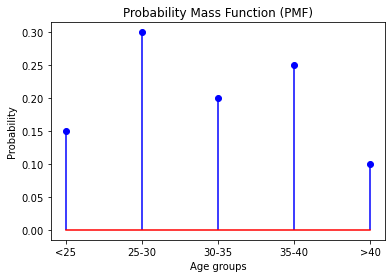

In [17]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import stem


plt.stem(outcome_df['Age Range'], outcome_df['PMF'], linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Age groups')
plt.ylabel('Probability')
plt.title('Probability Mass Function (PMF)')
plt.show()

Actual uses of using population data to build probability distributions:

- **Galaxy distribution in our universe:** 
    - sampling: our galactic local group
- **All ad click data on Facebook:**
    - sampling: specific user likehood to click on given add given their preferences

#### Mathematical models of distribution

- In many cases: know what a population distribution _should_ be.
- Can model uncertainty: mathematically define a model governing statistics or population level data.

**Often referred to as generative modeling**

#### Common types of distributions: Discrete 

Mathematical distribution of random variables $X$:
- governed by specific functional form
- parameters of distribution $\theta$

Probability has some specific functional form depending on $X$ and $\theta$.

$$ P(X|\theta) $$

*Note*: This is a probability of the random variable $X$ conditioned on $\theta$.

The parameters $\theta$ are not random variables.

### Examples of discrete distributions

- **Bernoulli Distribution**
    - Represents the probability of success for a certain experiment (binary outcome).
    - Did someone click on an ad banner or not?

$$ B(X| p) = p^X(1-p)^{1-X} $$

Random variable $X$:
- Yes: X = 1 <br>
- No: X = 0 <br>

$p$: probability of banner clicked. This is a parameter.

Probability of clicked:
$$ B(X = 1| p) = p $$ <br>

Probability of not clicked:
$$ B(X = 0| p) = 1 - p $$

Scipy stats can help us with sampling distribution/plotting PMF, etc

Probability is 4% of ad being clicked.

In [5]:
# import bernoulli
from scipy.stats import bernoulli

bernoulli_pmf = [(x, bernoulli.pmf(x, p = .04)) for x in [0,1]]
bernoulli_pmf

[(0, 0.96), (1, 0.04)]

The pmf can be visualized with a stem plot:

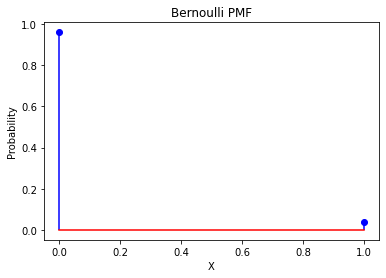

In [35]:
# create list of x values and a list of y values for matplotlib
unzipped_bernoulli = list(zip(*bernoulli_pmf))

plt.stem(unzipped_bernoulli[0], unzipped_bernoulli[1], linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Bernoulli PMF')
plt.show()

#### Expectation values: mean and variance of a distribution

The population mean (i.e. the expected value of $X$ under the distribution) is the a sum of:
- possible values of the random variable $X$
- weighted by the probability distribution of $X$ at these values.

$$ E[X] = \sum_i X_i P(X_i|\theta) $$

where $\theta$ is possible parameters of the distribution.

First calculate for a uniform distribution:

If we have three possible values for a each equally likely:
    
$$E[X] = X_1\cdot\frac{1}{3} + X_2\cdot\frac{1}{3} + X_3\cdot\frac{1}{3} $$


$$ E[X] = \frac{X_1 + X_2 + X_3}{3} $$

Let' do this for the Bernoulli distribution:

$$ E[X] = 1\cdot B(X =1 | p) + 0 \cdot B(X = 0 | p) = p $$

as  $ B(X =1 | p) = p $

The variance on the other hand is:

$$ E[(X - E[X])^2] =  \sum_i (X_i - E[X])^2 P(X_i|\theta)$$

which for the Bernulli distribution is:

$$  (1 - p)^2 B(X = 1| p) + (0 - p)^2 B(X = 0| p) $$

implies that:
    
$$ Var[X] = (1 - p)^2p + (0 - p)^2(1 - p) $$

and fully simplified:
$$ Var[X] = p(1 - p) $$

Mean and variance of $X$  for our ad clicking example?

In [6]:
# calculate it for me 

p = 0.04

mean = p
var = p*(1-p)
print(mean, var)

0.04 0.0384


Scipy also has a useful method for getting mean, variance of the distribution:
- .stats(parameters, ...)

In [37]:
# gives mean and variance in a tuple
bernoulli.stats(p = 0.04)

(array(0.04), array(0.0384))

#### Sampling
- More often than not we use the Bernoulli distribution in simulations:
    - create a finite size sample modeled from distribution.
    

Let's random sample this distribution 100 times.

In [10]:
bernoulli.rvs(p = 0.04, size = 100)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

A very useful program:

In [13]:
for x in bernoulli.rvs(p = 0.5, size = 10):
    if x == 1:
        print('She loves me.')
    else:
        print('She loves me not.')

She loves me not.
She loves me not.
She loves me not.
She loves me not.
She loves me not.
She loves me.
She loves me.
She loves me.
She loves me not.
She loves me not.


- **Binomial Distribution**
    - Generalizes Bernoulli to fixed number of trials.
    - Given $N$ trials, chance of observing $k$ successes.
    

#### Example

-  Estimate number of successful free throw shots in 8 tries.
- For Shaquille O'Neale: Career free throw pct = 52.7%

<img src = "images/shaw.webp" >
<center> Shaq throwin free throw bricks. </center>

scipy has functionality for binomial:
- .binom class

Define binomial:
- distribution parameters:
    - N = 8 trials
    - Bernoulli success/failure p = .527

In [14]:
from scipy.stats import binom
N = 8
p = 0.527

pmf_binomial = [(x, binom.pmf(x, n = N, p = p)) 
                for x in range(9)]

Generates probability of $k$ sucesses in 8 trials:  $k$ ranging from 0 to 8.

In [15]:
print(pmf_binomial)

[(0, 0.002505469532410439), (1, 0.02233204978571333), (2, 0.08708555143709994), (3, 0.1940553302636433), (4, 0.27026204822658584), (5, 0.24089319140027182), (6, 0.1341973698392635), (7, 0.042719428514220385), (8, 0.005949561000791267)]


Plot the pmf:

In [18]:
%%capture binom_plot
x,y = list(zip(*pmf_binomial))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title('Binomial PMF: Shaq FTs made out of 8 shots')
plt.ylabel('Probability')
plt.xlabel('Number of shots made')
plt.title
plt.show()

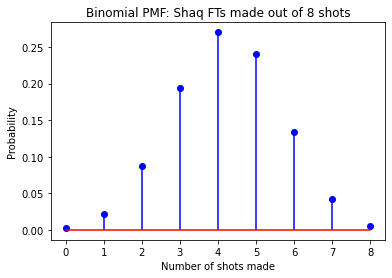

In [43]:
binom_plot()

#### Let's compute Shaq free throw distribution statistics on 8 shots
- based off of knowledge it must follow binomial
- career percentage of 52.7%

In [44]:
avg_shots_made, shots_made_std = binom.stats(n = 8, p =.527)
print('Average shots made in 8 tries = ' + str(avg_shots_made))
print('Spread on shots made  in 8 tries= ' + str(shots_made_std))

Average shots made in 8 tries = 4.216
Spread on shots made  in 8 tries= 1.994168


Note there is a small skew in this distribution:
- other statistics: skew and kurtosis
- expectation value of third and fourth moments

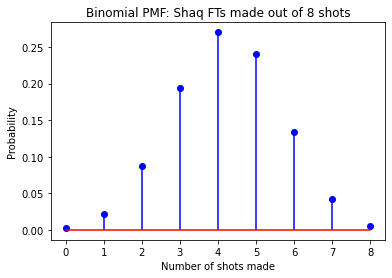

In [45]:
binom_plot()

Can access these additional statistics:
- 's' stands for skew, 'k' for kurtosis

In [20]:
 binom.stats(n = 8, p =.527, moments = 'mvsk' )

(array(4.216), array(1.994168), array(-0.03823956), array(-0.24853774))

Can sample this binomial distribution:
- Get a list of number of successes for each trial (number of shots Shaq made)
- 200 trials (e.g. maybe number of games where Shaq shot only 8 free throws)

Can sample this binomial distribution:

In [21]:

N = 8  # number of samples for user-site interaction trial
p = 0.527  # probability of success
size = 200  # number of trials

# Create a discrete distribution with the given parameter values
binomial = binom.rvs(n = N, p=p, size=size)

print(f'Number of shots Shaq made in games where he took 8 free throws: \n {binomial} \n')

Number of shots Shaq made in games where he took 8 free throws: 
 [4 6 3 5 7 5 5 6 4 5 4 4 3 7 6 5 6 4 3 5 5 3 7 4 6 3 6 4 6 4 5 6 4 5 4 4 4
 5 4 2 6 4 5 2 3 6 3 4 4 7 7 3 8 6 3 6 7 4 3 3 1 3 7 3 3 4 5 7 6 3 1 5 2 3
 5 4 4 5 6 3 5 5 6 4 4 5 7 5 6 5 4 3 3 3 5 5 4 3 7 5 7 5 5 2 4 6 6 5 3 5 4
 5 4 2 4 3 5 4 2 6 4 4 5 2 4 4 6 1 4 2 6 4 4 4 3 4 5 4 6 4 3 5 2 2 5 2 5 1
 4 6 2 3 6 4 4 5 6 4 2 6 4 4 6 4 6 3 4 6 4 3 4 3 6 6 6 3 3 4 1 3 2 4 4 7 5
 5 5 6 3 8 3 6 5 4 5 6 4 4 3 5] 



#### The Poisson Distribution

A useful distribution when counting the number of counts in a fixed interval:
- and we have knowledge of the mean counts

Radioactive decay:
- Tabulate mean counts / min on Geiger counter from Americum-241:
    - $\lambda$ (a parameter)
- Now want distribution of counts per min $n$: 
    - a random variable

#### Derivation: let's do it on the board

A limiting case of the binomial distribution where $N \rightarrow \infty $

PMF of Poisson counting process:
$$ P(n|\lambda) = \frac {\lambda ^{n}e^{-\lambda }}{n!} $$

- $\lambda$ is observed average rate.
- Parameter of distribution: observed from data.

scipy.stats can really help us model/visualize this.
- poisson.pmf(n, lambda)

**Take lambda = 3 counts/min**

In [22]:
from scipy.stats import poisson
lambda_rate = 3
call_pmf =[(x, poisson.pmf(x,  mu =lambda_rate)) 
           for x in range(10)]

x_amer,y_amer = list(zip(*call_pmf))

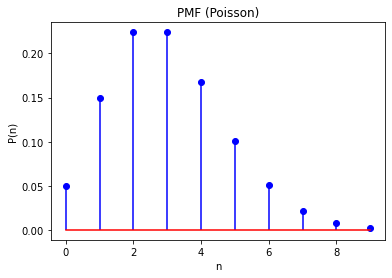

In [49]:
plt.stem(x_amer, y_amer, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('n')
plt.ylabel('P(n)')
plt.title('PMF (Poisson)')
plt.show()

This distribution clearly has skew.

Calculate the distribution statistics:

In [23]:
poisson.stats(mu = lambda_rate, moments = 'mvsk')

(array(3.), array(3.), array(0.57735027), array(0.33333333))

See anything interesting?

For Poisson:

$$ E[n] = \lambda $$
$$ Var[n] = \lambda $$

Sometime parameter determined from laws of physics, domain knowledge, etc.:

- Mean nuclear decay rate of Iodine-131 is 31.5 decay events/year. Quantum physics.

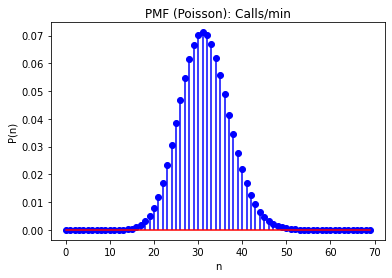

In [51]:
nuclear_pmf =[(x, poisson.pmf(x, 31.5)) for x in range(70)]
x,y = list(zip(*nuclear_pmf))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('n')
plt.ylabel('P(n)')
plt.title('PMF (Poisson): Calls/min')
plt.show()


Gets more symmetric and bell-shaped as $\lambda$ gets larger.

Poisson distribution pops up pretty regularly in data science:
- Natural language processing with bag-of-words document vectorization 
- Count distribution in political polling, etc.

#### Common types of distributions: Continuous 

So far dealt with distributions over discrete variables.

What about when $X$ a random variable: continuous spectrum of values?

But we can define probability in an interval:
- probability that $X$ lies in [0.1, 0.25]
- given sample space is [0, 1]

$$ P(0.1 \leq X \leq 0.25) = 0.15$$

Thus we can define probability in a collection of finite size intervals:
- Have already done this.
- Histograms.

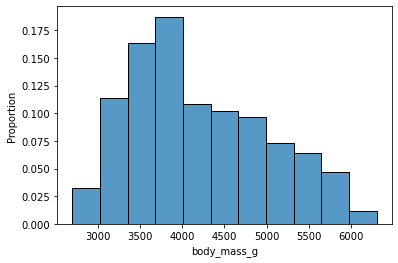

In [52]:
import seaborn as sns
penguins_df = sns.load_dataset('penguins')
sns.histplot(x = 'body_mass_g', data = penguins_df, stat = 'proportion')
plt.show()

But enumerating probability of a single value of $X$ is not the correct thing to do. 

**Why?**
- Let's imagine a continuous line [0,1]
- Infinite number of points.
- Probability of getting X = 0.5?


$$ P(X = 0.5) = \frac{1}{\infty} = 0$$ 

Probability of getting exactly a point on this interval is 0.

#### PDF: Probability Density Function


**Probability density functions (PDF)** similar to PMFs but:

- continuous variable
- probability of **exactly** having a given value of continuous not defined. 
- *density* is defined. 
- probability in small interval defined as density*interval

![](images/pdf_temp.png)

- PDFs give us probability density.
- Area under PDF in given range yields probability.  

<center><img src="Images/pdf_proba.gif" width="450"/></center>

Area under entire curve:

- Probability of entire interval of possible values

**Must equal 1**

<center><img src = "Images/total_area_probunity.png"></center>

Probability in an interval:

<center><img src = "Images/pdf_interval.png"></center>

- **Continuous Uniform**
    - A continuous distribution that takes values within a specified range *a* to *b*, when each value within the range is equally likely.


e.g. position of ball bouncing elastically between two walls

<img src = "Images/wallbounce.jpg" >

**Spicy stats time!**
- uniform defaults to interval [0,1] as sample space

In [24]:
from scipy.stats import uniform

#### PDF: Probability Density Function
Instead of PMF:
- has .pdf() function to get probability density function

In [25]:
# list of X values on interval
X = np.linspace(-1,2, 500)
print(X)

[-1.         -0.99398798 -0.98797595 -0.98196393 -0.9759519  -0.96993988
 -0.96392786 -0.95791583 -0.95190381 -0.94589178 -0.93987976 -0.93386774
 -0.92785571 -0.92184369 -0.91583166 -0.90981964 -0.90380762 -0.89779559
 -0.89178357 -0.88577154 -0.87975952 -0.87374749 -0.86773547 -0.86172345
 -0.85571142 -0.8496994  -0.84368737 -0.83767535 -0.83166333 -0.8256513
 -0.81963928 -0.81362725 -0.80761523 -0.80160321 -0.79559118 -0.78957916
 -0.78356713 -0.77755511 -0.77154309 -0.76553106 -0.75951904 -0.75350701
 -0.74749499 -0.74148297 -0.73547094 -0.72945892 -0.72344689 -0.71743487
 -0.71142285 -0.70541082 -0.6993988  -0.69338677 -0.68737475 -0.68136273
 -0.6753507  -0.66933868 -0.66332665 -0.65731463 -0.65130261 -0.64529058
 -0.63927856 -0.63326653 -0.62725451 -0.62124248 -0.61523046 -0.60921844
 -0.60320641 -0.59719439 -0.59118236 -0.58517034 -0.57915832 -0.57314629
 -0.56713427 -0.56112224 -0.55511022 -0.5490982  -0.54308617 -0.53707415
 -0.53106212 -0.5250501  -0.51903808 -0.51302605 -0.

.pdf() can take in a numpy array for $X$ and return the pdf evaluated on array:

In [26]:
# remember uniform distribution over [0,1]
unif_pdf = uniform.pdf(X)
unif_pdf

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

#### Visualization of uniform distribution

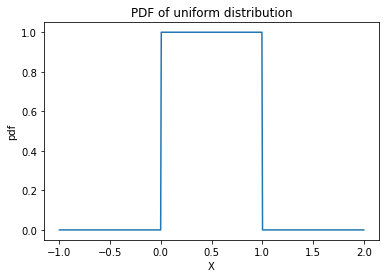

In [27]:
fig,ax = plt.subplots()
ax.plot(X, unif_pdf)
ax.set_title('PDF of uniform distribution')
ax.set_xlabel('X')
ax.set_ylabel('pdf')
plt.show()

What is area under this curve?

Uniform .pdf() has location and scale argument:
- loc = ___ is start of interval
- scale = ___ is range of sample space
- uniform probability density over [loc, loc + scale]

Bouncing ball:
$ X = \pm 5$

Get pdf

In [28]:
X_b = np.linspace(-6,6, 1000)

# sample space is [-5,5]
bouncing_pdf = uniform.pdf(X_b, loc = -5,
                         scale = 10)

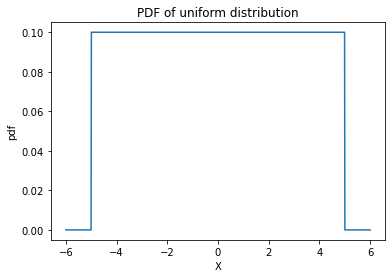

In [29]:
fig,ax = plt.subplots()
ax.plot(X_b, bouncing_pdf)
ax.set_title('PDF of uniform distribution')
ax.set_xlabel('X')
ax.set_ylabel('pdf')
plt.show()

- **Normal (Gaussian)**
    - The bell curve. Governs many continuous variables.
    - Particularly: variables made up of many random subfactors.
    - heights in a population.

#### Sampling and the PDF with the normal distribution

Mathematical form for pdf:
$$ N(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

- $\mu$ is mean.
- $\sigma$ is standard deviation.

- $\mu$ governs position of mean of distribution
- $\sigma$ governs width of distribution

With scipy.stats:

- norm.pdf(loc = mean, scale = std)
- by default loc = 0 and scale = 1

**The standard normal distribution**

In [30]:
from scipy.stats import norm
x = np.linspace(-4,4, 100)
pdf_norm = norm.pdf(x)

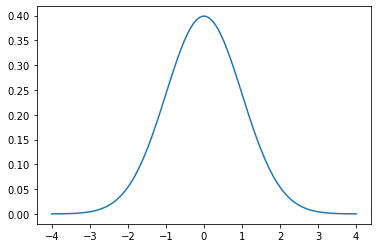

In [31]:
plt.plot(x, pdf_norm)
plt.show()

Screwing around with the distribution parameters:

In [32]:
# Moving mean around
mu_list = [-2,0,2]
sigma = 1

x = np.linspace(-7,7)
y_list = [norm.pdf(x, loc = mu, scale = sigma)
          for mu in mu_list]

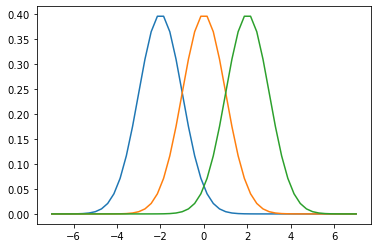

In [62]:
fig,ax = plt.subplots()
[ax.plot(x,y) for y in y_list]
plt.show()

In [33]:
# mess with std/variance
mu = 0
sigma_list = [1,2,4]

x = np.linspace(-8,8)
y_list = [norm.pdf(x, loc = mu, scale = sigma)
          for sigma in sigma_list]

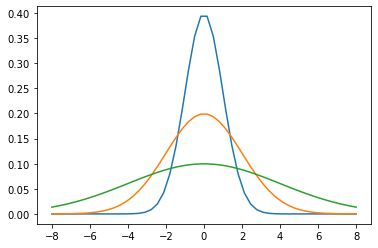

In [64]:
fig,ax = plt.subplots()
[ax.plot(x,y) for y in y_list]
plt.show()

The variance/std describes how closely the points gathered around the mean.  
- Low variance means tight and skinny, high variance short and wide.

The statistics of the standard normal:

In [34]:
norm.stats(moments = 'mvsk')

(array(0.), array(1.), array(0.), array(0.))

For non-standard normal:

In [66]:
norm.stats(loc = 2, scale = 1.5, moments = 'mvsk')

(array(2.), array(2.25), array(0.), array(0.))

Skew, kurtosis, and in fact all higher order moments of pdf vanish.

#### Sampling from normal distribution

- rvs method:

In [38]:
# 20 random samples from normal with mean 0 and std 1.
norm_sample = norm.rvs(loc = 0, scale = 1, size = 1000)
norm_sample

array([-1.45706176e-01, -1.02712687e+00, -3.75167699e-01, -1.82809578e+00,
        6.31122285e-01, -9.01372335e-01,  1.57758193e+00,  5.12571228e-01,
        1.56743025e+00,  1.58069722e-01, -9.00402817e-01,  2.11937591e-01,
       -1.19112579e+00, -3.59865785e-02, -2.09016484e-01, -2.02127779e+00,
       -7.02258492e-01, -1.06649427e+00,  2.01095254e-01, -5.62357958e-02,
       -9.03603260e-01,  7.08632284e-01,  9.55006991e-01, -5.48630979e-01,
        3.24265838e-01,  3.09206821e-01,  2.73604134e-01,  8.32225373e-01,
        5.58451098e-01, -5.40908727e-01,  1.57936864e-01, -1.53060260e+00,
        2.90438581e-01, -1.14215517e+00,  2.53998242e+00, -4.12387830e-01,
        1.44312147e+00, -6.45538007e-01,  4.17496273e-01,  1.23632857e+00,
       -1.18961061e-01, -4.47368223e-01, -6.65332193e-02,  2.47679232e-01,
        3.12870887e-01,  2.24056131e-01, -1.33831034e+00, -1.43861724e+00,
        1.29213649e+00, -1.50720509e+00,  8.75877446e-01, -1.57095657e+00,
        8.05442651e-02, -

Looking at a histogram of sample:

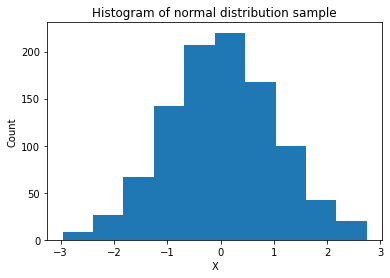

In [39]:
plt.hist(norm_sample)
plt.title('Histogram of normal distribution sample')
plt.xlabel('X')
plt.ylabel('Count')
plt.show()

#### CDF: Cumulative Distribution Function
Probability random variable <= a certain value. 


Mathematically, CDF is:

$$F(x) = P(X\leq x)$$

CDF exists for all probability distributions (discrete/continuous):


**Applies to both continuous pds and discrete pmfs**



Mathematically, CDF is:

$$F(x) = P(X\leq x)$$

Why use the CDF?
- Continuous variables:
- Actually reports probability
- Simple arithmetic operations to calculate probability of given range.

Implicitly used in most hypothesis tests:
- Calculate probability of a measured value or values more extreme
- CDF yields whether measured value is likely under a given distribution.

####  Discrete case:

An ad-clicking example: 

- Use CDF to calculate probability of having <= 2 clicks in 50 random samples.
- where $p = 0.1$ for a click.

$$P(x \leq 2)$$

#### CDF in scipy.stats

- scipy.stats.binom.cdf()

- Generally, scipy.stats.distribution.cdf(arguments)


In [40]:
# Create the random discrete value for the number of success

n = 50
p = 0.1

# Calculate the probability for x equal or less than 2
binom.cdf(2, n = n , p = p)

0.1117287563463473

Visualize pmf and cdf side by side

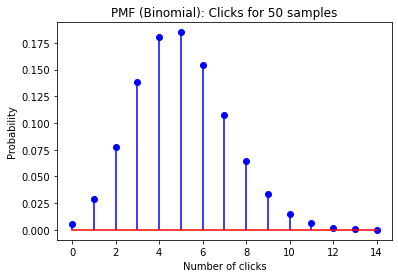

In [70]:
x = np.arange(0,15,1)
y = binom.pmf(x, n = n , p = p)
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Number of clicks')
plt.ylabel('Probability')
plt.title('PMF (Binomial): Clicks for 50 samples')
plt.show()

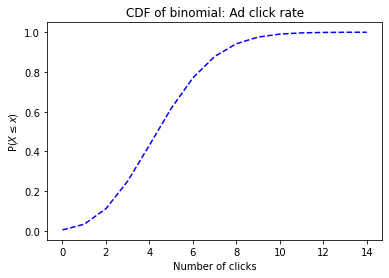

In [71]:
cdf_y = binom.cdf(k = x, n=n, p=p)
plt.plot(x, cdf_y, c = 'b', linestyle = '--')
plt.xlabel('Number of clicks')
plt.ylabel('P($X \leq x$)')
plt.title('CDF of binomial: Ad click rate')
plt.show()

- What is the probability of getting less than or equal to 8 clicks?

In [72]:
binom.cdf(8, n = n, p = p)

0.9421327942819058

$$ P (X > 8) $$

In [42]:
# survival function
binom.sf(8, n = n, p =p)

0.057867205718094256

- Probability of getting less than infinity?
(this is all possible values)

In [74]:
binom.cdf(np.inf, n = n, p = p)

1.0

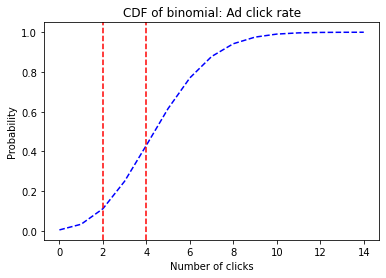

In [75]:
cdf_y = binom.cdf(k = x, n=n, p=p)
plt.plot(x, cdf_y, c = 'b', linestyle = '--')
plt.xlabel('Number of clicks')
plt.ylabel('Probability')
plt.title('CDF of binomial: Ad click rate')
plt.axvline(2, c = 'r', linestyle = '--')
plt.axvline(4, c = 'r', linestyle = '--')
plt.show()

What is probability of getting between 2 and 4?
- $ P(x <= 4) - P(x<=2)$

In [76]:
Pless4 = binom.cdf(k = 4, n=n, p=p)  
Pless2 = binom.cdf(k = 2, n=n, p=p)

Pless4 - Pless2

0.31946965048271503

What is the probability that we have greater than 4 clicks?
$$ P(x <= \infty) - P(x<=4)$$

$$ 1 - P(x<=4) $$

In python:

In [77]:
1 - binom.cdf(4, n, p)

0.5688015931709377

Equivalently, though faster:
- $P(X >x)$ as survival function: distribution.sf()

In [78]:
binom.sf(4, n , p)

0.5688015931709377

5\% chance of getting greater than 4 clicks in 50 randomized user-site interactions.

Generally:
$$ P(X > x) = 1 - P(X <= x) $$

<center>1 - distribution.cdf(x, parameters) </center>

#### Continuous Distribution
- CDF of the normal distribution

Example case: distribution of heights. 

We observe the mean is 5.5 ft with a standard deviation of 0.5 ft.

Model with normal distribution.

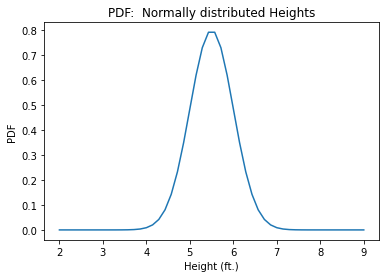

In [287]:
mu = 5.5 # mean
sigma = 0.5 # standard deviation

x = np.linspace(2,9)
y_norm = norm.pdf(x, loc = mu, scale = sigma)
plt.plot(x, y_norm)
plt.xlabel('Height (ft.)')
plt.ylabel('PDF')
plt.title('PDF:  Normally distributed Heights')
plt.show()


Probability that height <= 4.7:

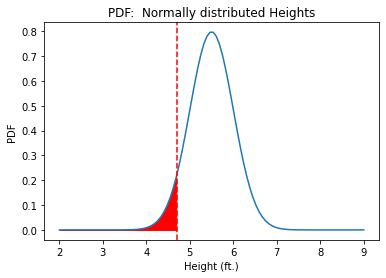

In [44]:
mu = 5.5 # mean
sigma = 0.5 # standard deviation

x = np.linspace(2,9, num = 100)
y_norm = norm.pdf(x, loc = mu, scale = sigma)
plt.plot(x, y_norm)
plt.fill_between(x,y_norm, where = (x <= 4.7), color='r')
plt.axvline(x = 4.7, c = 'r', linestyle = '--')
plt.xlabel('Height (ft.)')
plt.ylabel('PDF')
plt.title('PDF:  Normally distributed Heights')
plt.show()

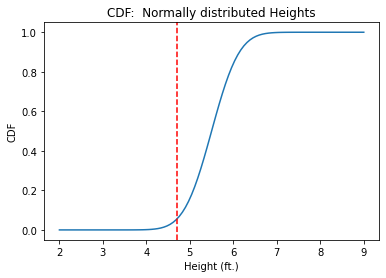

In [45]:
mu = 5.5 # mean
sigma = 0.5 # standard deviation

x = np.linspace(2,9, num = 100)
y_norm_cdf = norm.cdf(x, loc = mu, scale = sigma)
plt.plot(x, y_norm_cdf)
plt.axvline(x = 4.7, c = 'r', linestyle = '--')
plt.xlabel('Height (ft.)')
plt.ylabel('CDF')
plt.title('CDF:  Normally distributed Heights')
plt.show()

#### Continuous variables

- Value of cdf at x = 4.7
- area under pdf at x <= 4.7

In [46]:
norm.cdf(4.7, loc = mu, scale = 0.5 )

0.05479929169955804

Probability that height is greater than 4.5 ft and less than 6 ft?
- Help me out. Use cdf.

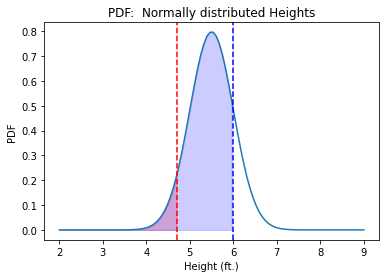

In [293]:
mu = 5.5 # mean
sigma = 0.5 # standard deviation

x = np.linspace(2,9, num = 100)
y_norm = norm.pdf(x, loc = mu, scale = sigma)
plt.plot(x, y_norm)
plt.fill_between(x,y_norm, where = (x <= 4.7), color='r', alpha = 0.2)
plt.fill_between(x,y_norm, where = (x <= 6), color='b', alpha = 0.2)
plt.axvline(x = 4.7, c = 'r', linestyle = '--')
plt.axvline(x = 6, c = 'b', linestyle = '--')
plt.xlabel('Height (ft.)')
plt.ylabel('PDF')
plt.title('PDF:  Normally distributed Heights')
plt.show()

In [47]:
# mu is defined as mean already, set scale to 0.5 (std)
mu = 5.5
stdev = 0.5

norm.cdf(6, loc = mu, scale = stdev) - norm.cdf(4.7, loc = mu, scale = stdev )

0.7865454543689849